In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iamsouravbanerjee/animal-image-dataset-90-different-animals")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/animal-image-dataset-90-different-animals


In [5]:
# Importing necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report

In [6]:
# Ensuring the GPU is being used
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print('GPU is being used.')
else:
    print('GPU is not being used.')

GPU is being used.


In [7]:
# Path to the dataset
dataset_path = "/kaggle/input/animal-image-dataset-90-different-animals/animals/animals"

# List all the classes (Animal Types)
classes = os.listdir(dataset_path)
num_classes = len(classes)

# Display the number of classes along with names
print(f'Number of Classes: {num_classes}')
print(f'Classes: {classes}')


Number of Classes: 90
Classes: ['beetle', 'parrot', 'fox', 'wolf', 'hedgehog', 'turtle', 'snake', 'shark', 'horse', 'antelope', 'hamster', 'woodpecker', 'eagle', 'chimpanzee', 'bison', 'penguin', 'butterfly', 'sandpiper', 'hornbill', 'lion', 'lobster', 'oyster', 'otter', 'grasshopper', 'raccoon', 'dog', 'pigeon', 'donkey', 'hippopotamus', 'hummingbird', 'bear', 'coyote', 'bee', 'pig', 'rat', 'owl', 'caterpillar', 'koala', 'squid', 'hare', 'whale', 'mouse', 'tiger', 'fly', 'lizard', 'orangutan', 'bat', 'porcupine', 'kangaroo', 'gorilla', 'starfish', 'mosquito', 'crow', 'possum', 'goldfish', 'swan', 'elephant', 'sheep', 'dragonfly', 'zebra', 'seal', 'octopus', 'cow', 'ox', 'wombat', 'reindeer', 'panda', 'duck', 'goose', 'goat', 'badger', 'flamingo', 'crab', 'seahorse', 'rhinoceros', 'dolphin', 'okapi', 'moth', 'sparrow', 'pelecaniformes', 'squirrel', 'leopard', 'jellyfish', 'ladybugs', 'cockroach', 'hyena', 'cat', 'deer', 'turkey', 'boar']


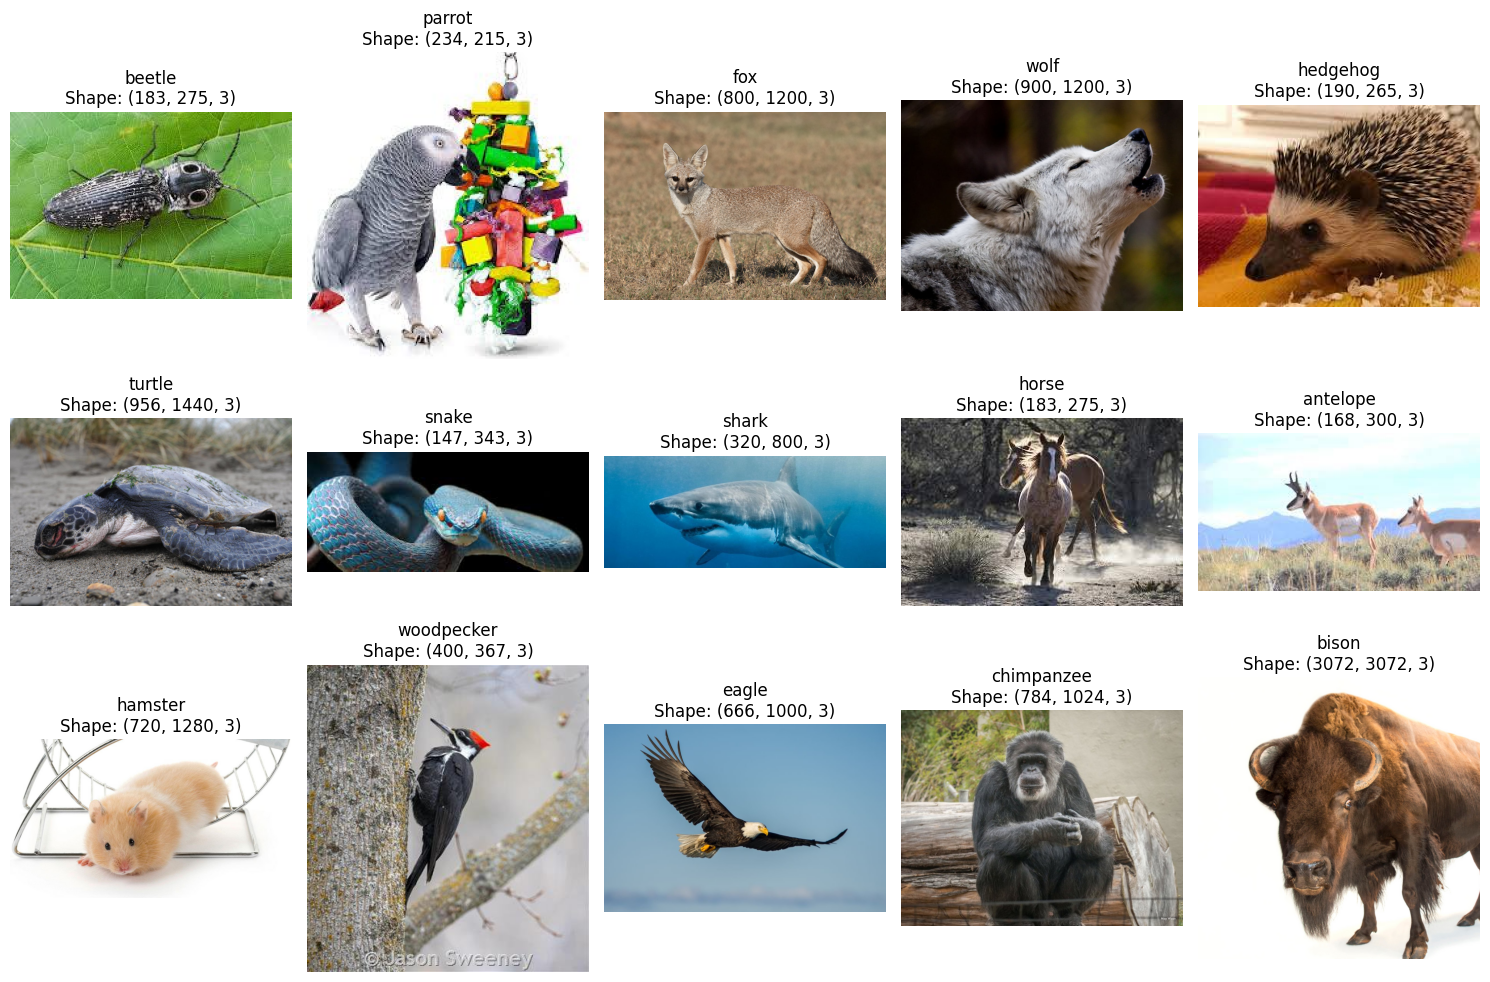

In [8]:
# Visualize some sample images form the dataset
num_images_to_display = 15

# Create a figure and axes
fig, axes = plt.subplots(3, 5, figsize=(15, 10))  # 3 rows, 5 columns for 15 images
axes = axes.flatten()  # Flatten to a 1D array for easier indexing

# Loop through the desired number of classes
for i, class_name in enumerate(classes[:num_images_to_display]):
    class_path = os.path.join(dataset_path, class_name)

    # Check if the path is a directory before proceeding
    if os.path.isdir(class_path):
        img_files = [f for f in os.listdir(class_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

        if img_files:
            img_path = os.path.join(class_path, img_files[0])  # Select the first image
            img = plt.imread(img_path)  # Load image

            axes[i].imshow(img)  # Display on the corresponding subplot
            axes[i].set_title(f'{class_name}\nShape: {img.shape}')
            axes[i].axis('off')
        else:
            print(f"Warning: No images found in {class_name}")
    else:
        print(f"Skipping {class_name} as it is not a directory.")

plt.tight_layout()
plt.show()

In [20]:
# Path to the dataset
dataset_path = "/kaggle/input/animal-image-dataset-90-different-animals/animals/animals"

# Verify if the path exists
if os.path.exists(dataset_path):
    print("Dataset path found.")
else:
    print(f"Error: Dataset path not found: {dataset_path}")
    print("Please check if the dataset is downloaded and the path is correct.")
    # You can optionally exit here if the path is not found:
    # import sys
    # sys.exit(1)
# Define image size and batch size based on MobileNetV2 (224x224 input size)
img_size = (224, 224)
batch_size = 64

# Data Augmentation and preprocessing setup
datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize pixel values to [0, 1]
    rotation_range=20,           # Randomly rotate images in the range (degrees)
    width_shift_range=0.2,       # Horizontally shift images
    height_shift_range=0.2,      # Vertically shift images
    shear_range=0.2,             # Shearing transformations
    zoom_range=0.2,              # Random zoom
    horizontal_flip=True,        # Randomly flip images horizontally
    fill_mode='nearest',         # Filling strategy for new pixels
    validation_split=0.1         # Reserve 10% of data for validation
)

# Training data generator
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True  # Shuffle the training data
)

# Validation data generator
validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False  # Optional: keep validation order consistent
)


Dataset path found.
Found 4860 images belonging to 90 classes.
Found 540 images belonging to 90 classes.


In [15]:


# Map the classes - class_indices
class_indices = train_generator.class_indices

# Reverse the dictionary to get class names from indices
indices_to_class = {v: k for k, v in class_indices.items()}

# Print class indices
print("Class Indices:", class_indices)

# Extract class names using the reversed dictionary
class_names = [indices_to_class[i] for i in range(len(class_indices))]

print("Class Names:", class_names)


Class Indices: {'antelope': 0, 'badger': 1, 'bat': 2, 'bear': 3, 'bee': 4, 'beetle': 5, 'bison': 6, 'boar': 7, 'butterfly': 8, 'cat': 9, 'caterpillar': 10, 'chimpanzee': 11, 'cockroach': 12, 'cow': 13, 'coyote': 14, 'crab': 15, 'crow': 16, 'deer': 17, 'dog': 18, 'dolphin': 19, 'donkey': 20, 'dragonfly': 21, 'duck': 22, 'eagle': 23, 'elephant': 24, 'flamingo': 25, 'fly': 26, 'fox': 27, 'goat': 28, 'goldfish': 29, 'goose': 30, 'gorilla': 31, 'grasshopper': 32, 'hamster': 33, 'hare': 34, 'hedgehog': 35, 'hippopotamus': 36, 'hornbill': 37, 'horse': 38, 'hummingbird': 39, 'hyena': 40, 'jellyfish': 41, 'kangaroo': 42, 'koala': 43, 'ladybugs': 44, 'leopard': 45, 'lion': 46, 'lizard': 47, 'lobster': 48, 'mosquito': 49, 'moth': 50, 'mouse': 51, 'octopus': 52, 'okapi': 53, 'orangutan': 54, 'otter': 55, 'owl': 56, 'ox': 57, 'oyster': 58, 'panda': 59, 'parrot': 60, 'pelecaniformes': 61, 'penguin': 62, 'pig': 63, 'pigeon': 64, 'porcupine': 65, 'possum': 66, 'raccoon': 67, 'rat': 68, 'reindeer': 69,